# Simulating a Van der Pol oscillator with python

Here we do a very simple simulator of the Van der Pol oscillator, https://en.wikipedia.org/wiki/Van_der_Pol_oscillator, i.e., a system whose ODE is defined as:

In [1]:
# define the function that returns the vector dy/dt = [dy1/dt ; dy2/dt]
def myModel(y, t):
    #
    # parameters
    mu = 0.1
    #
    # get the individual variables - for readability
    y1 = y[0]
    y2 = y[1]
    #
    # individual derivatives
    dy1dt  = mu * ( y1 - np.power(y1,3)/3 - y2 )
    dy2dt  = y1 / mu
    #
    return [ dy1dt, dy2dt ]

The code below will thus define first the packages needed to run the simulation, and then execute the main call to the function that solves numerically the ODE above.

In [2]:
# load the necessary packages
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [3]:
# define the initial conditions
y0 = [ 2, 2 ] # [ y1(0), y2(0) ]

# define the time points where the solution is computed
n    = 100
tmax = 20
t    = np.linspace(0, tmax, n)

# solve the ODE
y = odeint(myModel, y0, t)

# get the individual variables
y1 = y[:,0]
y2 = y[:,1]

The next cell will plot the results obtained above.

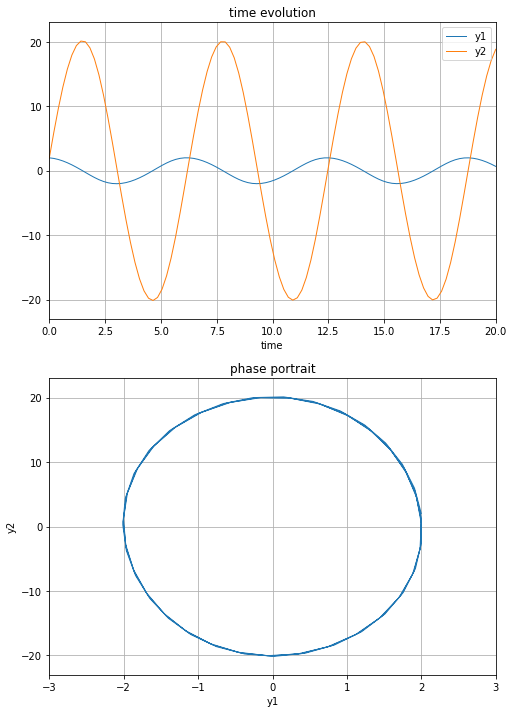

In [6]:
# create two subfigures (stacked vertically)
fig, ax = plt.subplots(2, 1, figsize=(8,12))

# plot the time evolution
ax[0].plot(t, y1, label='y1', linewidth=1)
ax[0].plot(t, y2, label='y2', linewidth=1)
ax[0].grid()
ax[0].set_xlim([0, tmax])
ax[0].set_ylim([np.floor( np.min([ y1, y2 ]) * 1.1 ), np.ceil( np.max([ y1, y2 ]) * 1.1 ) ] )
ax[0].legend(loc = 'upper right')
ax[0].set_xlabel('time')
ax[0].set_title('time evolution')

# plot the phase portrait
ax[1].plot(y1, y2, linewidth=1)
ax[1].grid()
ax[1].set_xlim([np.floor( np.min(y1) * 1.1 ), np.ceil( np.max(y1) * 1.1 )])
ax[1].set_ylim([np.floor( np.min(y2) * 1.1 ), np.ceil( np.max(y2) * 1.1 )])
ax[1].set_xlabel('y1')
ax[1].set_ylabel('y2')
ax[1].set_title('phase portrait')

plt.show()